In [14]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

INFO:tensorflow:Load image with size: 887, num_label: 70, labels: Ajisaisoukeizu, AjisaisoukeizuFake, AppleOrange, BarFB, BirthVenus, BirthVenusFake, BlueBoy, BlueBoyFake, Capitolini, CapitoliniFake, ClothedMaja, David, DavidFake, Diskobolos, DiskobolosFake, Doguu, DoguuFake, FifePlayer, FightingTemeraire, Fuujin, FuujinFake, Gleaners, Heibayo, HeibayoFake, HoumuwuDing, HoumuwuDingFake, HunterSnow, HunterSnowFake, IsleOfDead, Kamehameha, Kanagawa, LasMeninas, LasMeninasFake, LibertyLeading, Mikaeri, MikaeriFake, Milkmaid, MilkmaidFake, Milo, MiloFake, MonaLisa, MonaLisaFake, Nefertiti, NefertitiFake, NightWatch, NightWatchFake, OlmecaHead, OlmecaHeadFake, OotaniOniji, OotaniOnijiFake, Ophelia, PearlEarring, PearlEarringFake, PortraitCecilia, PortraitCeciliaFake, Raijin, RaijinFake, RosettaStone, RosettaStoneFake, Samothrace, SamothraceFake, Slower, StarryNight, Summer, SummerFake, SundayOn, Sunflower, Thinker, VitruvianMan, VitruvianManFake.


INFO:tensorflow:Load image with size: 887, num_label: 70, labels: Ajisaisoukeizu, AjisaisoukeizuFake, AppleOrange, BarFB, BirthVenus, BirthVenusFake, BlueBoy, BlueBoyFake, Capitolini, CapitoliniFake, ClothedMaja, David, DavidFake, Diskobolos, DiskobolosFake, Doguu, DoguuFake, FifePlayer, FightingTemeraire, Fuujin, FuujinFake, Gleaners, Heibayo, HeibayoFake, HoumuwuDing, HoumuwuDingFake, HunterSnow, HunterSnowFake, IsleOfDead, Kamehameha, Kanagawa, LasMeninas, LasMeninasFake, LibertyLeading, Mikaeri, MikaeriFake, Milkmaid, MilkmaidFake, Milo, MiloFake, MonaLisa, MonaLisaFake, Nefertiti, NefertitiFake, NightWatch, NightWatchFake, OlmecaHead, OlmecaHeadFake, OotaniOniji, OotaniOnijiFake, Ophelia, PearlEarring, PearlEarringFake, PortraitCecilia, PortraitCeciliaFake, Raijin, RaijinFake, RosettaStone, RosettaStoneFake, Samothrace, SamothraceFake, Slower, StarryNight, Summer, SummerFake, SundayOn, Sunflower, Thinker, VitruvianMan, VitruvianManFake.


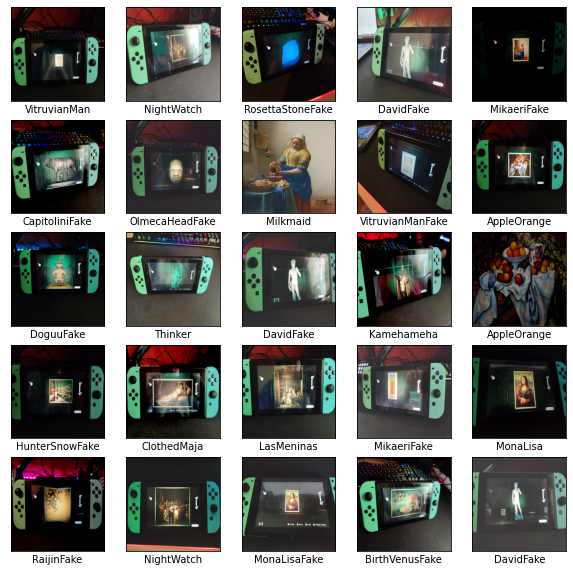

In [21]:
image_path = "./images"
data = DataLoader.from_folder(image_path)

train_data, rest_data = data.split(0.9)
validation_data, test_data = rest_data.split(0.5)

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [22]:
model = image_classifier.create(train_data, validation_data=validation_data, model_spec=model_spec.get('mobilenet_v2'), epochs=100, dropout_rate=0.25, batch_size=32, train_whole_model=True, learning_rate=0.001, shuffle=True)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_4 (Hub  (None, 1280)             2257984   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 70)                89670     
                                                                 
Total params: 2,347,654
Trainable params: 2,313,542
Non-trainable params: 34,112
_________________________________________________________________
None
Epoch 1/100
24/24 [==============================] - 22s 563ms/step - loss: 4.5166 - accuracy: 0.0417 - val_loss: 4.3973 - val_accuracy: 0.0455
Epoch 2/100
24/24 [==============================] - 14s 509ms/step - loss: 3.1745 - acc

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_4 (Hub  (None, 1280)             2257984   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 70)                89670     
                                                                 
Total params: 2,347,654
Trainable params: 2,313,542
Non-trainable params: 34,112
_________________________________________________________________


In [24]:
loss, accuracy = model.evaluate(test_data)

2/2 [==============================] - 3s 566ms/step - loss: 1.1799 - accuracy: 0.9111


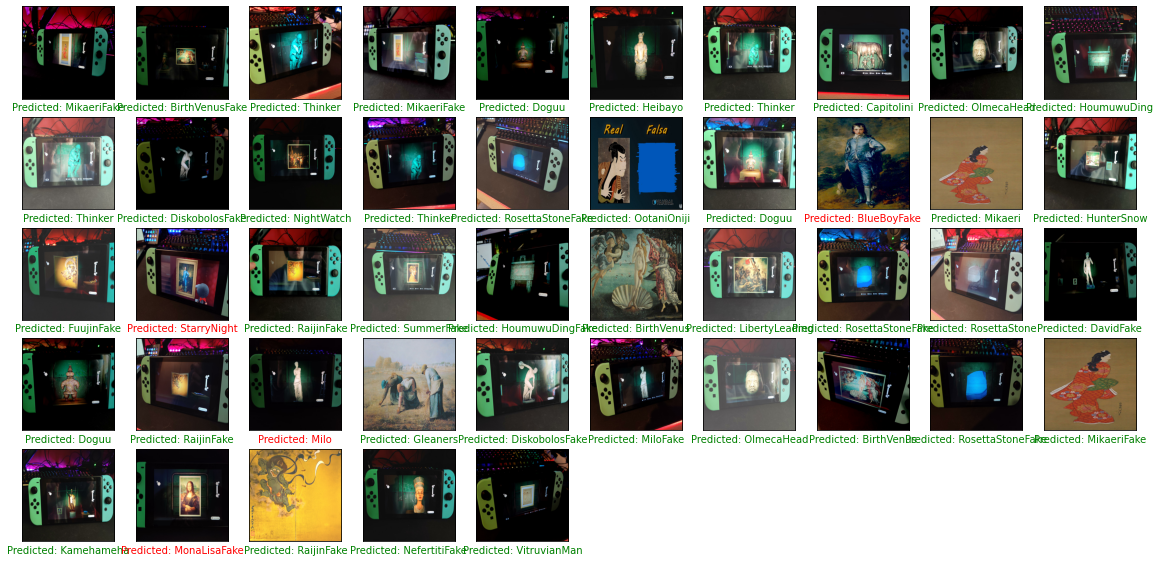

In [25]:
# A helper function that returns 'red'/'green' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'green'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [27]:
#Exportar sin Quantizacion
model.export(export_dir='.')

INFO:tensorflow:Assets written to: C:\Users\thela\AppData\Local\Temp\tmp0i1wm320\assets


INFO:tensorflow:Assets written to: C:\Users\thela\AppData\Local\Temp\tmp0i1wm320\assets
c:\Users\thela\Documents\UAB\TFG\2-PrimerProgres\new_training_model\venv\lib\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\thela\AppData\Local\Temp\tmpt9m66n7x\labels.txt


INFO:tensorflow:Saving labels in C:\Users\thela\AppData\Local\Temp\tmpt9m66n7x\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: .\model.tflite


In [28]:
config = QuantizationConfig.for_float16()
#Exportar con Quantizacion
model.export(export_dir='.', tflite_filename='custom_model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: C:\Users\thela\AppData\Local\Temp\tmph3gztoh0\assets


INFO:tensorflow:Assets written to: C:\Users\thela\AppData\Local\Temp\tmph3gztoh0\assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\thela\AppData\Local\Temp\tmp2ri1ql6_\labels.txt


INFO:tensorflow:Saving labels in C:\Users\thela\AppData\Local\Temp\tmp2ri1ql6_\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: .\custom_model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: .\custom_model_fp16.tflite


In [30]:
print("Metricas sin Quant"+str(model.evaluate_tflite('model.tflite', test_data)))
print("Metricas Quant"+str(model.evaluate_tflite('custom_model_fp16.tflite', test_data)))

Metricas sin Quant{'accuracy': 0.9333333333333333}
Metricas Quant{'accuracy': 0.9111111111111111}
